**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
fdiry = file.path(FD_RES, "results", "region", "annotation_ccres")
fname = "description.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
vec = dat$Name

vec_txt_cnames1 = vec
IRdisplay::display(dat)

Name,Description
<chr>,<chr>
Chrom,Chromosome
Start,Start position
End,End position
Name,Name
Score,Score
Strand,[+-.]; Use '.' if no strand is assigned.
ThickStart,The starting position at which the feature is drawn thickly
ThickEnd,The ending position at which the feature is drawn thickly
ItemRgb,"An RGB value of the form R,G,B (e.g. 255,0,0)"


In [3]:
vec_txt_cnames2 = c(
    "Chrom_Guide", "Start_Guide", "End_Guide", "Guide_ID", "Score", "Gene"
)

In [4]:
ASSAY   = "CRISPRi_FlowFISH"
FOLDER  = "coverage_ccres_v4"

fdiry = file.path(FD_RES, "results", ASSAY, FOLDER)
fname = "Merge_HCRFF_rAVG.log2FC_2.filtered.bed.gz"
fpath = file.path(fdiry, fname)

vec1 = vec_txt_cnames1
vec1 = paste0(vec1, "_A")

vec2 = vec_txt_cnames2
#vec2 = paste0(vec2, "_B")
vec_txt_cnames = c(vec1, vec2, "Overlap")

dat = read_tsv(fpath, col_names = vec_txt_cnames, show_col_types = FALSE)

dat_peak_score_import = dat
print(dim(dat))
head(dat)

[1] 287631     18


Chrom_A,Start_A,End_A,Name_A,Score_A,Strand_A,ThickStart_A,ThickEnd_A,ItemRgb_A,Category_A,Note_A,Chrom_Guide,Start_Guide,End_Guide,Guide_ID,Score,Gene,Overlap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
chr11,4092009,4092343,EH38E2941664,0,.,4092009,4092343,"255,205,0",dELS,All-data/Full-classification,chr11,4092012,4092013,id-129,0.872537,HBE1,1
chr11,4092009,4092343,EH38E2941664,0,.,4092009,4092343,"255,205,0",dELS,All-data/Full-classification,chr11,4092013,4092014,id-130,1.318650,HBE1,1
chr11,4092009,4092343,EH38E2941664,0,.,4092009,4092343,"255,205,0",dELS,All-data/Full-classification,chr11,4092017,4092018,id-131,-0.105160,HBE1,1
chr11,4092009,4092343,EH38E2941664,0,.,4092009,4092343,"255,205,0",dELS,All-data/Full-classification,chr11,4092018,4092019,id-132,0.216536,HBE1,1
chr11,4092009,4092343,EH38E2941664,0,.,4092009,4092343,"255,205,0",dELS,All-data/Full-classification,chr11,4092019,4092020,id-133,-0.269330,HBE1,1
chr11,4092009,4092343,EH38E2941664,0,.,4092009,4092343,"255,205,0",dELS,All-data/Full-classification,chr11,4092038,4092039,id-134,-1.367700,HBE1,1


## Arrange

In [10]:
dat = dat_peak_score_import
dat = dat %>% 
    dplyr::mutate(
        Chrom  = Chrom_A,
        Start  = Start_A,
        End    = End_A,
        Region = paste0(Chrom_A, ":", Start_A, "-", End_A),
        Gene   = Gene,
        Index  = Name_A,
        Label  = Category_A,
        Score  = Score
    ) %>%
    dplyr::select(
        Chrom, Start, End, Region, Gene, Index, Label, Score
    )

###
dat_peak_score_arrange = dat
print(dim(dat))
head(dat)

[1] 287631      8


Chrom,Start,End,Region,Gene,Index,Label,Score
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr11,4092009,4092343,chr11:4092009-4092343,HBE1,EH38E2941664,dELS,0.872537
chr11,4092009,4092343,chr11:4092009-4092343,HBE1,EH38E2941664,dELS,1.318650
chr11,4092009,4092343,chr11:4092009-4092343,HBE1,EH38E2941664,dELS,-0.105160
chr11,4092009,4092343,chr11:4092009-4092343,HBE1,EH38E2941664,dELS,0.216536
chr11,4092009,4092343,chr11:4092009-4092343,HBE1,EH38E2941664,dELS,-0.269330
chr11,4092009,4092343,chr11:4092009-4092343,HBE1,EH38E2941664,dELS,-1.367700


**Check**

In [12]:
dat = dat_peak_score_arrange
dat = dat %>% dplyr::select(Chrom, Gene) %>% dplyr::distinct()
dat

Chrom,Gene
<chr>,<chr>
chr11,HBE1
chr11,HBG1
chr11,HBG2
chr11,HBS1L
chr11,MYB
chr11,CAPRIN1
chr11,CAT
chr11,LMO2
chr11,FADS1


## Summary

In [13]:
###
dat = dat_peak_score_arrange
dat = dat %>% dplyr::mutate(Sign  = ifelse(Score > 0, "pos", "neg"))
table(dat$Sign)


   neg    pos 
152331 135300 

In [14]:
###
dat = dat_peak_score_arrange
dat = dat %>% dplyr::mutate(Sign  = ifelse(Score > 0, "pos", "neg"))

###
dat_summary_total = dat %>%
    dplyr::group_by(Region, Gene) %>%
    dplyr::summarise(
        Mean    = mean(Score),
        Median  = median(Score),
        Max     = max(Score),
        Min     = min(Score),
        Count   = n(),
        .groups = "drop"
    )

###
dat_summary_sign = dat %>%
    dplyr::group_by(Region, Gene, Sign) %>%
    dplyr::summarise(Mean = mean(Score), .groups = "drop") %>% 
    dplyr::mutate(Sign = dplyr::recode(Sign, `pos` = "Mean_Pos", `neg` = "Mean_Neg")) %>% 
    tidyr::spread(Sign, Mean)

###
dat = dplyr::left_join(
    dat_summary_total,
    dat_summary_sign,
    by = c("Region", "Gene")) %>% 
    replace(is.na(.), 0)

dat_peak_score_summary = dat
print(dim(dat))
head(dat)

[1] 18467     9


Region,Gene,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
chr11:33064238-33064442,CAPRIN1,-0.621251091,-0.5727760,0.217096,-2.265460,11,-0.7974806,0.1717815
chr11:33064238-33064442,CAT,-0.036045000,-0.1544540,1.792080,-1.038090,11,-0.4661079,1.1107893
chr11:33064238-33064442,LMO2,0.133220000,0.0910970,0.919454,-0.479535,11,-0.2757578,0.4740348
chr11:33064452-33064801,CAPRIN1,-0.057939591,0.0391085,1.691810,-2.351120,22,-0.7462876,0.4186090
chr11:33064452-33064801,CAT,-0.005705227,0.0379285,2.664580,-1.789820,22,-0.6082166,0.4963876
chr11:33064452-33064801,LMO2,0.051482364,-0.0096500,1.412590,-1.193420,22,-0.4999403,0.6029050


In [27]:
dat = dat_peak_score_summary
dat = dat %>% 
    dplyr::group_by(Region) %>%
    dplyr::summarize(
        Mean_Tot = mean(Mean),
        Mean_Pos = max(Mean, 0),
        Mean_Neg = min(Mean, 0),
        Count    = sum(Count),
        Note     = paste(Gene, Count, sep=":", collapse="|"),
        .groups  = "drop"
    ) %>%
    dplyr::rename("Mean" = "Mean_Tot")

dat_peak_score_summary_merge = dat
print(dim(dat))
head(dat)

[1] 9508    6


Region,Mean,Mean_Pos,Mean_Neg,Count,Note
<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>
chr11:33064238-33064442,-0.174692030,0.13322000,-0.62125109,33,CAPRIN1:33|CAT:33|LMO2:33
chr11:33064452-33064801,-0.004054152,0.05148236,-0.05793959,66,CAPRIN1:66|CAT:66|LMO2:66
chr11:33064932-33065193,0.227909722,0.35328775,0.00000000,36,CAPRIN1:36|CAT:36|LMO2:36
chr11:33065612-33065919,0.008820937,0.15108512,-0.08050919,48,CAPRIN1:48|CAT:48|LMO2:48
chr11:33067336-33067679,0.027872875,0.18167258,-0.06737354,72,CAPRIN1:72|CAT:72|LMO2:72
chr11:33069061-33069230,-0.446141556,0.00000000,-0.68554842,36,CAPRIN1:36|CAT:36|LMO2:36


In [15]:
dat = dat_peak_score_summary
summary(dat$Count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   12.00   15.58   21.00   85.00 

In [16]:
dat = dat_peak_score_summary
table(dat$Count)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 347  440  487  692  819 1037 1054 1076 1116 1000  897  686  650  634  498  538 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 459  436  493  420  363  328  318  323  230  273  250  191  203  175  151  157 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 126  119  142  102  102   87  105  102   57   77   36   61   55   65   48   19 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  41   50   28   14   38   22    5   34   18    8   19   13    6   12   12   10 
  65   66   68   69   70   71   72   73   75   76   77   78   80   81   83   84 
   6   15   14    2    2    4    1   11    6    1    8   16    1    3    1    1 
  85 
   1 

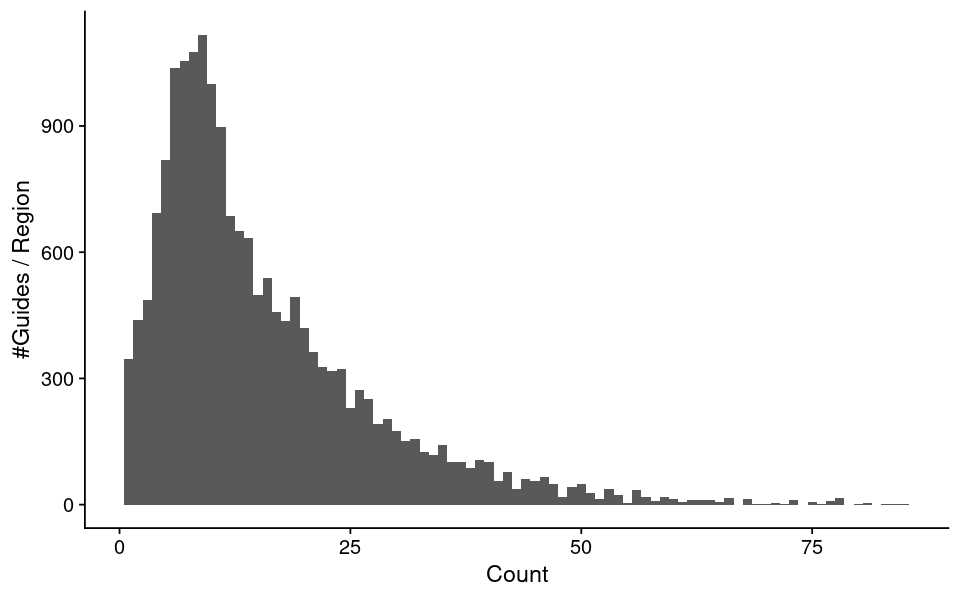

In [17]:
dat = dat_peak_score_summary
gpt = ggplot(dat, aes(x=Count)) + 
    geom_histogram(binwidth = 1) + 
    labs(y="#Guides / Region") +
    theme_cowplot()
options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

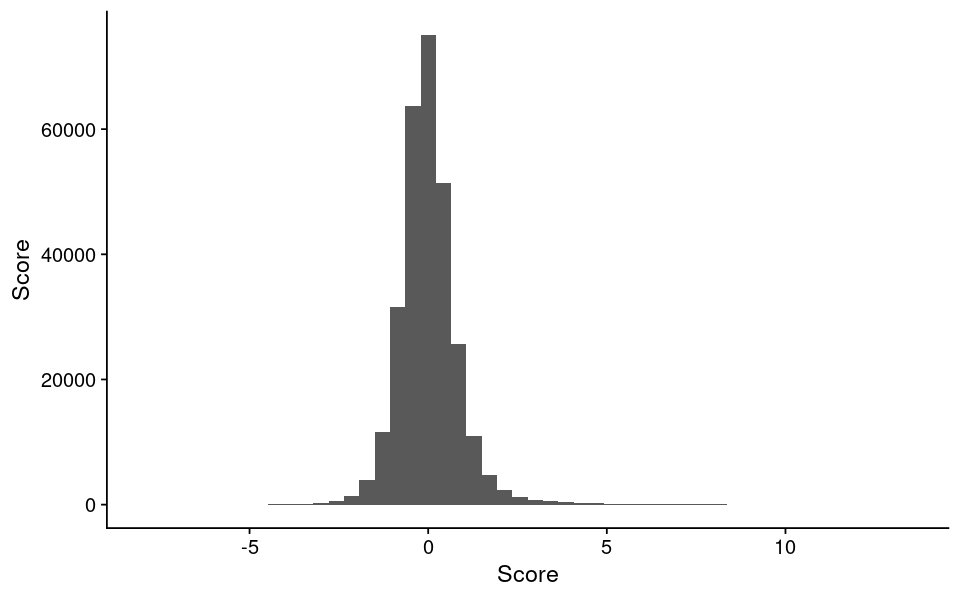

In [18]:
dat = dat_peak_score_arrange
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 50) + 
    labs(y="Score") +
    theme_cowplot()
print(gpt)

## Save results

In [19]:
ASSAY

[1] "CRISPRi_FlowFISH"

In [20]:
FOLDER

[1] "coverage_ccres_v4"

In [23]:
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.score.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_score_arrange
write_tsv(dat, fpath)

In [24]:
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.summary.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_score_summary
write_tsv(dat, fpath)

In [28]:
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "results.summary.Merge.tsv"
fpath = file.path(fdiry, fname)

dat = dat_peak_score_summary_merge
write_tsv(dat, fpath)